In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## MALAI Challenge - Dots and Boxes

In [Dots and Boxes](https://en.wikipedia.org/wiki/Dots_and_boxes) two players alternately draw short horizontal or vertical lines on a grid.
When a player completes a box, they get another turn. 

Passing is not allowed.

The game ends when all possible lines have been drawn. The player who has completed
the most boxes wins.

The game is very simple to play but hard to play well!

---------

Your challenge should you choose to accept it, is to write a robot that plays Dots and Boxes.

A robot is a Python function that takes a `board` and makes a `move`.

We will explain both these concept below. 

In [2]:
from board import Board
from draw import drawboard

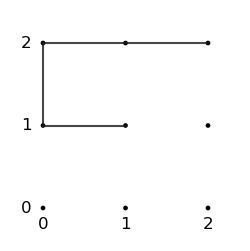

In [3]:
board = Board(size=2, lines=[(0, 1, 1, 1), (0, 1, 0, 2), (0, 2, 1, 2), (1, 2, 2, 2)], red_boxes=[], blue_boxes=[])
drawboard(board,size=3)

size  --> number of boxes in each row and column. Total boxes = size*size

lines --> lines on the board. each line (i,j,r,s) goes from (i,j) to (r,s)

We use the convention that i<=j and r<=s so lines go rightwards and upwards

Let's make a move! A move is a list of one or more lines.

In [4]:
from board import makemove, isvalidmove
move = [(1,0,1,1)]
board2 = makemove(board, move, 0)

In [5]:
isvalidmove(board, move)

True

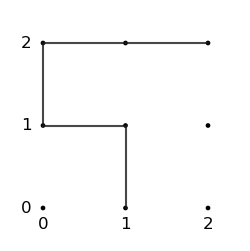

In [6]:
drawboard(board2, 3)

Let's make another move!

In [7]:
move = [(1,1,1,2)]
isvalidmove(board, move)

False

Why is this move invalid?

In [8]:
from board import getnewboxes

getnewboxes(board.lines, move[0])

[(0, 1)]

When you make a box, you have to make another move, and so on till either 

1. Your line does not make a box
2. The game ends

Remember: No passing.

In [13]:
move = [(1,1,1,2), (1,0,1,1)]
board3 = makemove(board, move, 1)

In [10]:
isvalidmove(board,move)

True

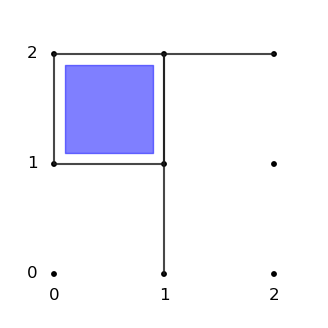

In [11]:
drawboard(board3)

Red = Player 0 moves first.

Blue = Player 1 moves second.

## A very simple robot

The simplest strategy is to draw a line at random.

Check if it makes a box. If so, draw another line at random...

That's it.

In [19]:
import random
from typing import List
from board import get_all_lines, Line

def make_random_move(board:Board)->List[Line]:
    n = board.size
    #All lines have already been made
    if len(board.lines) >= 2*n*(n+1):
        return []
    
    options = [l for l in get_all_lines(n) if l not in board.lines]
    line = random.choice(options)
    move = [line]
    options.remove(line)

    #As long as the line makes a box and is not the last line,
    #make another line
    while options and getnewboxes(board.lines+move[:-1], line):
        line = random.choice(options)
        move += [line]
        options.remove(line)

    if not isvalidmove(board, move):
        print("Oops",board,move)

    return move

#### Let's play random vs random. 

In [20]:
b = Board(size=2, lines=[])
board_list = [b]
m = make_random_move(b)
player = 0
while m:
    print(b,m)
    b = makemove(b,m,("red","blue")[player])
    board_list += [b]
    m = make_random_move(b)
    player = 1-player

Board(size=2, lines=[], red_boxes=[], blue_boxes=[]) [(1, 0, 1, 1)]
Board(size=2, lines=[(1, 0, 1, 1)], red_boxes=[], blue_boxes=[]) [(0, 0, 0, 1)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1)], red_boxes=[], blue_boxes=[]) [(1, 1, 1, 2)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 2)], red_boxes=[], blue_boxes=[]) [(0, 1, 0, 2)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 2), (0, 1, 0, 2)], red_boxes=[], blue_boxes=[]) [(1, 2, 2, 2)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 2), (0, 1, 0, 2), (1, 2, 2, 2)], red_boxes=[], blue_boxes=[]) [(1, 0, 2, 0)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 2), (0, 1, 0, 2), (1, 2, 2, 2), (1, 0, 2, 0)], red_boxes=[], blue_boxes=[]) [(2, 0, 2, 1)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 2), (0, 1, 0, 2), (1, 2, 2, 2), (1, 0, 2, 0), (2, 0, 2, 1)], red_boxes=[], blue_boxes=[]) [(0, 0, 1, 0)]
Board(size=2, lines=[(1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 2), (0, 1, 0, 2), (

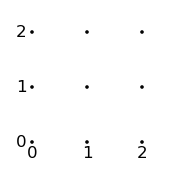

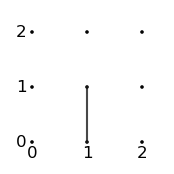

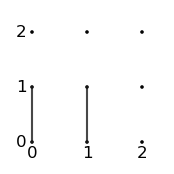

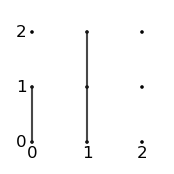

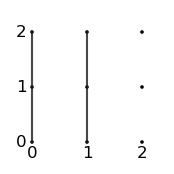

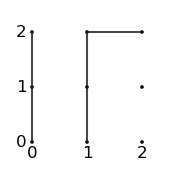

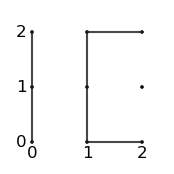

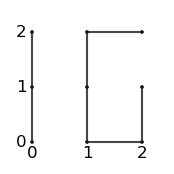

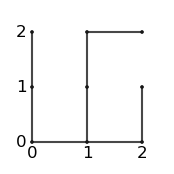

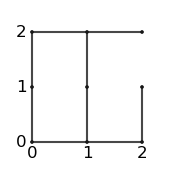

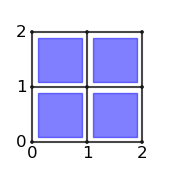

In [21]:
%matplotlib inline
from IPython.display import display

ims = [drawboard(b,2) for b in board_list]
display(*ims)

`board.py` contains all the helper functions you need.

`draw.py` has the `drawboard` that we have been using.

## Tips

1. My code *might* have bugs.
2. Use the validation functions. 
3. Program the simplest strategy first. 